#Парний t-критерій Стьюдента

##Теоретичні відомості

### Область застосування

t-критерій для парних вибірок застосовується для порівняння двох середніх значень отриманих від одного і того об'єкта. Два середніх можуть відображати такі явища, як:

* Вимірювання одного показника, які проведено в два різних моменти часу (наприклад, до і після тесту з проведеним втручанням між двома часовими точками)
* Вимірювання, проведене в двох різних умовах (наприклад, завершення тесту в умовах «контролю» і «експерименту»)
* Вимірювання проводяться з двох половин або сторін від суб'єкта або експериментальної одиниці (наприклад, вимір втрати слуху в лівому і правому вухах суб'єкта).

**Мета тесту** - визначити, чи є статистичні докази того, що середнє розходження між парними спостереженнями  значно відрізняється від нуля. t-критерій для парних вибірок - це параметричний тест.

### Вимоги до даних

Для використання даного критерію обов'язковим є:


1.   Залежна змінна має бути безперервною.
2.   Групи мають бути залежними.
3. Кількість груп не може бути більшою ніж 2.
4. Кількість обьектів в групах однакова (кожному спостереженню об'єкта в першій групі відповідає спостереження в другій).
5. Залежна група має мати нормальний розподіл.



In [4]:
import numpy as np
import pandas as pd

N=10

n1=abs(np.random.normal(1, 12, N))
n2=abs(np.random.normal(1, 11, N))

df=pd.DataFrame()
df['group1']=n1
df['group2']=n2

In [5]:
df

,group1,group2
0,4.188455,0.350316
1,11.625904,4.248511
2,15.979467,13.474337
3,11.053649,0.810452
4,1.303124,11.214669
5,14.034817,1.717580
6,0.858016,0.443317
7,9.979147,8.497681
8,16.385167,5.293093
9,0.720043,14.749618


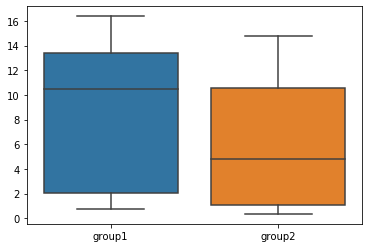

In [6]:
import seaborn as sns
%matplotlib inline

sns.boxplot(data=df)

### Гіпотеза

Гіпотеза, яка перевіряєть даним тестом може бути виражена наступним чином:

$H_0 : μ_1  = μ_2$ («парні групи рівні»)

$H_1 : μ_1  ≠ μ_2$ («парні групи відмінні»)

або:

$H_0 : μ_1  - μ_2 = 0$ («різниця між середніми у парних групах за показником, що досліджується рівна 0»)

$H_1 : μ_1 -  μ_2$ ≠ 0 $ («різниця між середніми у парних групах за показником, що досліджується не рівна 0»)

Тут $μ_1$ - середнє значення змінної в першій групі; $μ_2$ - середнє значення змінної в першій групі.

### Алгоритм розрахунку

#### Аналіз залежності між групами

Перед визначенням відмінності за парним критерієм Стьюента необхідно перевірити чи є зв'язок між групами.
Для цього використовують коефіцієнт кореляції Пірсона. Його розраховують за формулою:
$$ r = \frac{n\cdot \sum(x_i\cdot y_i) - (\sum x_i \cdot \sum y_i)}{\sqrt{(n\cdot \sum x_i^2 - (\sum x_i) ^2) \cdot (n\cdot \sum y_i^2 - (\sum y_i) ^2)}} $$

При знаходженні критичних значень для обчисленого коефіцієнта кореляції Пірсона  число ступенів свободи розраховується як $ df = n - 2 $. Знайдіть у [таблиці](https://drive.google.com/open?id=1e2bk9_U3qg3SVZ-lmeLkJcLQywm6fetc) рядок з відповідним або найбільш близьким df.

Якщо отриманий коефіцієнт кореляції більше табличного - існує статистично значима залежність між групами.

Величину зв'зку можна оцінити а таблицею:


Значення r  | Висновок |
------------- | ------------- |
0-0,3  | дуже слабкий  |
0,31-0,5  | слабкий   |
0,51-0,7  | середній   |
0,71-0,9  | високий   |
0,91-1  | дуже високий   |



In [7]:
def pirson(x, y, n):

    r=0

    sumXY=0
    nsumXY=0
    for i in range(n):
        sumXY+=x[i]*y[i]
    nsumXY=n*sumXY

    sumY=0
    sumX=0
    dobXY=1
    for i in range(n):
        sumY+=y[i]
        sumX+=x[i]
    dobXY=sumX*sumY

    sumX2=0
    sumY2=0
    ssumX=sumX**2
    ssumY=sumY**2
    for i in range(n):
        sumX2+=x[i]**2
        sumY2+=y[i]**2
    
    nsumX2=n*sumX2
    nsumY2=n*sumY2
    rx=nsumX2-ssumX
    ry=nsumY2-ssumY

    r=(nsumXY-dobXY)/((rx*ry)**(1/2))

    df=n-2
    c=0

    xl=pd.read_excel(r'C:\Git\BMD\laba №6/tab1.xlsx', sheet_name='Лист1')
    
    a=xl.df
    b=xl.res
    for i in range(n):
        if a[i]==df:
            c=i

    print("Кількість ступенів свободи: ", df)
    print("Значення коефіцієнту кореляції: ", r)

    if r>b[c]:
        print("існує статистично значима залежність між групами: ", r, ">", b[c])
    else:
        print("залежність між групами не статистично значима: ", r, "<", b[c])
    

#### Аналіз відмінності між групами

1. Розрахунок різниці між парними значеннями для кожного об'єкта. Приклад:

Група 1 (до)  | Група 2 (після) | Різниця ($d$) |
------------- | ------------- |--------- |
3  | 5  | -2   |
1  | 8   | -7   |
10  | 0   | 10   |

2. Розрахунок стататистичних показників:


*   Середнє значення різниці між значеннями ($M_d$).
*   Стандарне відхилення різниці між заченнями ($\sigma_d$).
3. Розрахунок значення t-критерію Стюдента за формулою:

$$t_{emp} = \frac{M_d}{\sigma_d}\cdot\sqrt{n}\$$

4. Визначення ступеня свободи критерію:

$$ df = n - 1 $$

5. Визначимо по  [таблиці критичних значень](https://drive.google.com/open?id=1e2bk9_U3qg3SVZ-lmeLkJcLQywm6fetc)  t-Стьюдента рівень значущості. Знайдіть у таблиці рядок з відповідним або найбільш близьким df.
Якщо $t_{emp} > t_{critical}$  приймається альтернативна гіпотеза про відмінність в середніх, в протилежному випадку - приймається нульова гіпотеза про рівність середніх.

In [8]:
def student(x, y, n):
    d=[0]*n
    sum1=0
    sum2=0
    
    for i in range(n):
        d[i]=x[i]-y[i]
        sum1+=d[i]
    md=sum1/n
    
    for i in range(n):
        sum2+=(d[i]-md)**2
    sd=(sum2/n)**(1/2)
    
    t=(md/sd)*(n**(1/2))
    
    df=n-1
    xl=pd.read_excel(r'C:\Git\BMD\laba №6/tab2.xlsx', sheet_name='Лист1')
    a=xl.df
    b=xl.result
    for i in range(n):
        if a[i]==df:
            c=i
            
    print("Кількість ступенів свободи: ", df)
    print("Значення критерію Стьдента: ", t)
    
    if t>b[c]:
        print("приймається альтернативна гіпотеза про відмінність в середніх, оскільки ", t, ">", b[c])
    else:
        print(" приймається нульова гіпотеза про рівність середніх, оскільки ", t, "<", b[c])

# Завдання

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище. Формат даних:

| Група 1 | Група 2  | 
| ------------- |--------- |
| $k_{1}  $   | $k_{2}$   |
| $...$   | $...$   |
| $k_{1n}$   | $k_{2n}$   |

2. Побудувати графік, що відображає розкид даних в групах. Приклад:
![alt text](https://s3.amazonaws.com/libapps/accounts/2515/images/spss_paired-t_example_boxplot.PNG)

3. Написати функції:
* для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

* для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant). 

4. Перевірити розбіжність на між групами на даних з п. 1. 

5. Сформувати висновок про взаємозв'язок між групами та про їх розбіжність. 

In [9]:
pirson(n1, n2, N)
print("**********************")
student(n1, n2, N)


Кількість ступенів свободи:  8
Значення коефіцієнту кореляції:  -0.086734117095729
залежність між групами не статистично значима:  -0.086734117095729 < 2.306
**********************
Кількість ступенів свободи:  9
Значення критерію Стьдента:  0.9653576237699402
приймається альтернативна гіпотеза про відмінність в середніх, оскільки  0.9653576237699402 > 0.6021


Висновок: залежність між групами не є статистично значимою, про що говорить критерій Пірсона, 
проте різниця між середніми у парних групах за показником, що досліджується рівна 0, а отже парні групи рівні.